# Stock versus News Articles

### Import libraries and files

In [144]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import yfinance as yf
from datetime import datetime, timedelta

In [145]:
# Define the path to the src directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.insert(0, src_dir)

if 'data_loader' in sys.modules:
    del sys.modules['data_loader']
if 'data_cleaner' in sys.modules:
    del sys.modules['data_cleaner']
if 'indicators' in sys.modules:
    del sys.modules['indicators']
if 'financial_metrics' in sys.modules:
    del sys.modules['financial_metrics']
if 'text_analysis' in sys.modules:
    del sys.modules['text_analysis']
if 'time_series_analysis' in sys.modules:
    del sys.modules['time_series_analysis']

from data_loader import DataLoader
from data_cleaner import DataCleaner
from indicators import TechnicalIndicators
from financial_metrics import FinancialMetrics
from text_analysis import TextAnalysis
from time_series_analysis import TimeSeriesAnalysis


### File path and Stickers

In [146]:
# File path to news data
filepath_news = "../data/raw_analyst_ratings/raw_analyst_ratings.csv"

# tickers for stock data
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
spy_ticker = ['SPY']
time_gap = 50
end_date = datetime.now()
start_date = end_date - timedelta(days=365 * time_gap)  # 50 years of data

### Load and Clean Data

#### Stock Data

In [147]:
# Initialize the DataLoader for stock data
loader_stock = DataLoader('stock', tickers=tickers, start_date=start_date, end_date=end_date)
loader_stock_spy = DataLoader('stock', tickers=spy_ticker, start_date=start_date, end_date=end_date)
# Load the stock data
stock_data = loader_stock.load_data()
stock_data_spy = loader_stock_spy.load_data()

# Initialize the DataCleaner
cleaner = DataCleaner()

# Clean the stock data
cleaned_stock_data = {}
for ticker, df in stock_data.items():
    cleaned_stock_data[ticker] = cleaner.clean_data(df, data_type='stock')

# Clean the market index data
cleaned_stock_data_spy = {}
for ticker, df in stock_data_spy.items():
    cleaned_stock_data_spy[ticker] = cleaner.clean_data(df, data_type='stock')

#### News data

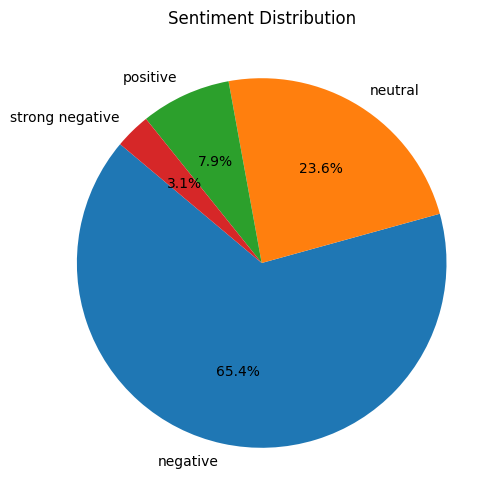

In [148]:
# Initialize the DataLoader for news data
loader_news = DataLoader('news', file_path=filepath_news)

# Load the news data
news_data = loader_news.load_data()

# Initialize the DataCleaner
cleaner = DataCleaner()

# Clean the news data
cleaned_news_data = cleaner.clean_data(news_data, data_type='news')

### Correlation | Sentiment vs Stock

#### Align stock and news data by date through date normalizing

In [152]:
# Align stock and 
aligned_data = cleaner.align_data(cleaned_stock_data, cleaned_news_data)


#### Correlation analysis and plot | Returns vs Sentiment

In [153]:
 # Prepare for correlation analysis
correlation_data = cleaner.prepare_for_correlation(aligned_data)

correlation_results = cleaner.calculate_and_plot_correlation(correlation_data)

print(correlation_results)

AAPL    0.074229
AMZN    0.050862
GOOG    0.078456
META    0.052133
MSFT    0.077163
NVDA    0.058701
TSLA    0.036937
dtype: float64


#### Time series | Returns vs sentiments

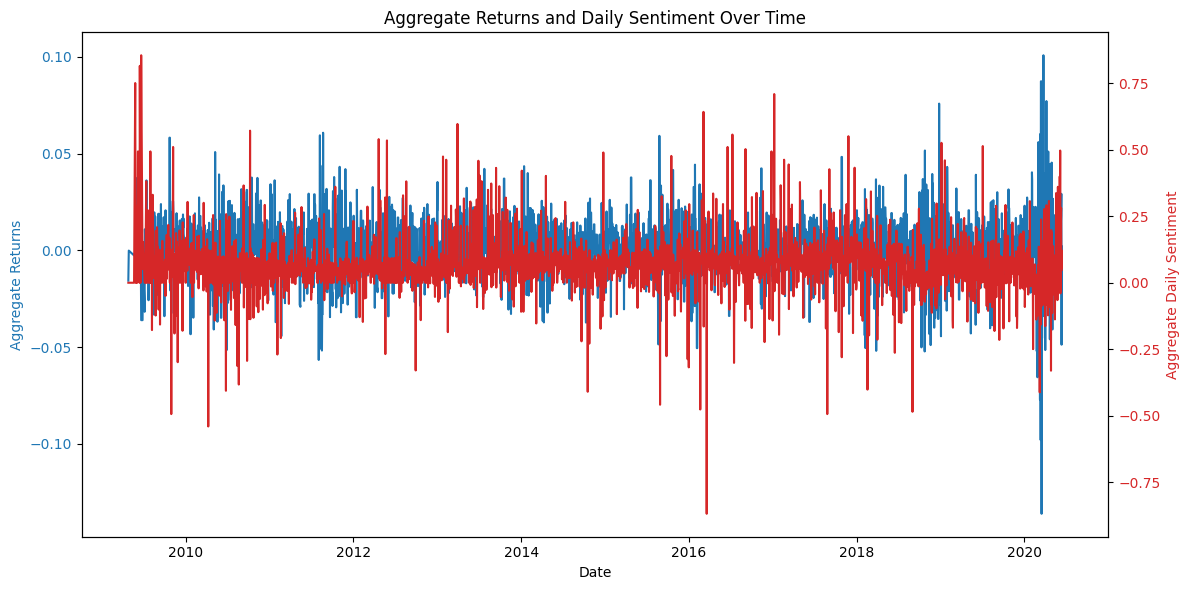

In [155]:
cleaner.time_series_aggregate_returns_and_sentiment_aggregate_returns_and_sentiment(aligned_data)